In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np


# def sig_energy(signal):
#     """
#     it calculate energy for given signal.
#     Parameters:
#     signal : array represent the signal.
#     return:
#     energy : signal energy.
#     """
#     signal = np.array(signal)
#     return np.sum(np.square(signal))/ np.count_nonzero(signal)


def gmBases(s1, s2):
    """
    The function calculates the Gram-Schmidt orthonormal bases 
    functions (Φ1 & Φ2) for two input signals (s1 & s2)   
    Parameters: 
    s1 : first transmitted signal.
    s2 : second transmitted signal.
    
    return: orthonormal bases functions (Φ1 & Φ2)
    """

    s1_energy = np.sum(np.square(np.asanyarray(s1))) / len(s1)
    Φ1 = s1 / (s1_energy ** 0.5)
    s21 = np.sum(Φ1 * s2) / len(s2)
    g2 = s2 - s21 * Φ1

    s2_energy = np.sum(np.square(np.asanyarray(g2))) / len(g2)
    Φ2 = g2 / (s2_energy ** 0.5)
    return Φ1, Φ2


def signal_space(s, phi1, phi2):
    '''
    The function calculates the signal space representation of input signal s 
    over the orthonormal bases functions (phi1 & phi2)
    
    Parameters: 
    s : input signal.
    phi1 : first orthonormal bases function.
    phi2 : second orthonormal bases function.
    
    return: v1,v2 is the projections of s over phi1 and phi2 respectively.
    '''
    v1 = np.sum(phi1 * s) / len(s)
    v2 = np.sum(phi2 * s) / len(s)

    return v1, v2


In [3]:
samples_no = 100


s1 = np.ones(samples_no)
s2 = np.ones(samples_no)

negative_s_samples = int(0.75 * samples_no)
s2[negative_s_samples:samples_no] = -1

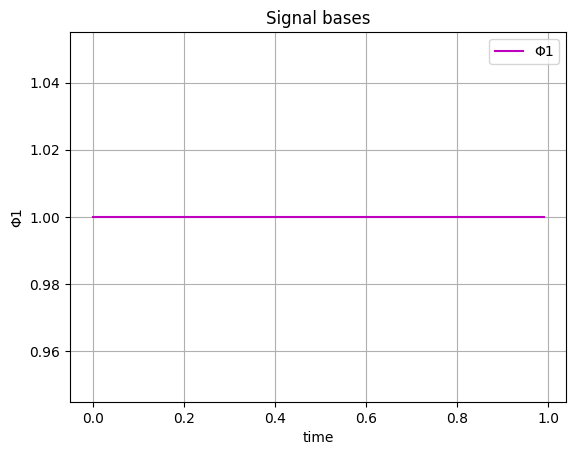

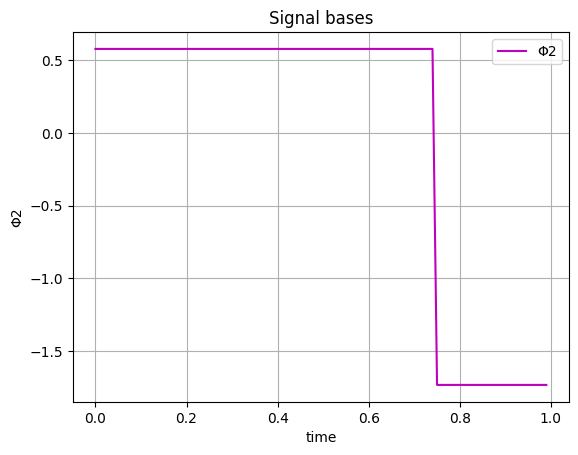

In [4]:
Φ1, Φ2 = gmBases(s1, s2)

#ploting
plt_range = np.arange(start=0, stop=1, step=0.01)
plt.plot(plt_range, Φ1, label = "Φ1", c='m')

plt.xlabel('time')
plt.ylabel('Φ1')
plt.title('Signal bases')

plt.legend()
plt.grid()
plt.show()
plt.plot(plt_range, Φ2, label = "Φ2", c = 'm')

plt.xlabel('time')
plt.ylabel('Φ2')
plt.title('Signal bases')
plt.legend()
plt.grid()
plt.show()

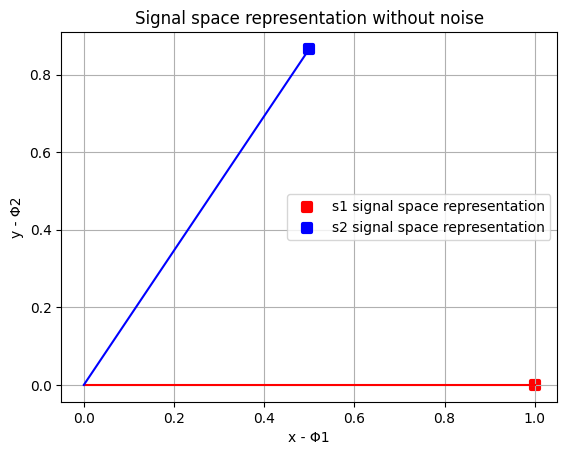

In [5]:
s11, s12 = signal_space(s1, Φ1, Φ2)
s21, s22 = signal_space(s2, Φ1, Φ2)
print(s11)
s1_signal_space = (s11, s12)  
origin = (0, 0)  
s2_signal_space = (s21, s22)
fig, ax = plt.subplots()
ax.plot([origin[0], s1_signal_space[0]], [origin[1], s1_signal_space[1]], c = 'r')
ax.plot([origin[0], s2_signal_space[0]], [origin[1], s2_signal_space[1]], c = 'b')


plt.scatter([s11], [s12],  marker="s", linewidths=3, label = "s1 signal space representation", c = 'r')
plt.scatter([s21], [s22],  marker="s", linewidths=3, label = "s2 signal space representation", c = 'b')

plt.xlabel('x - Φ1')
plt.ylabel('y - Φ2')
plt.title('Signal space representation without noise')

plt.legend()
plt.grid()
plt.show()

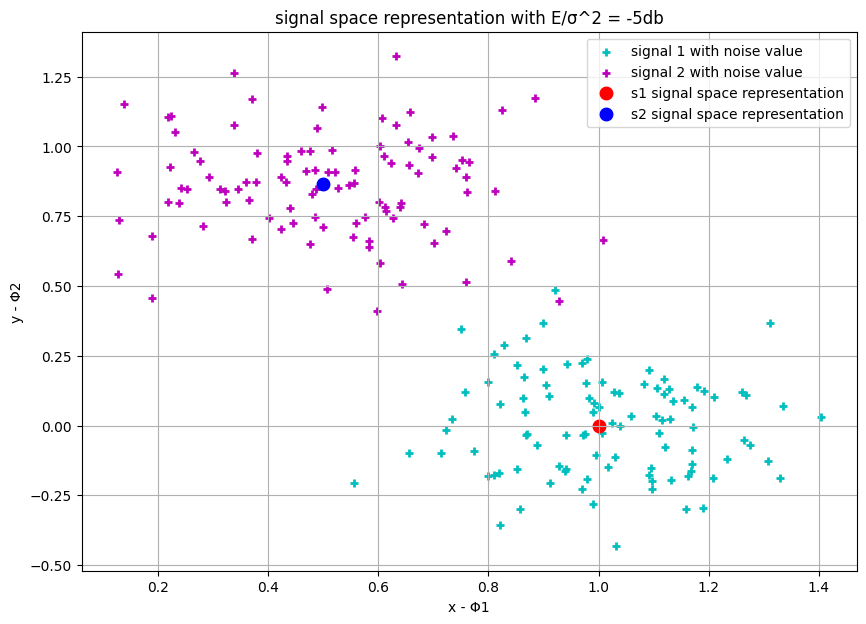

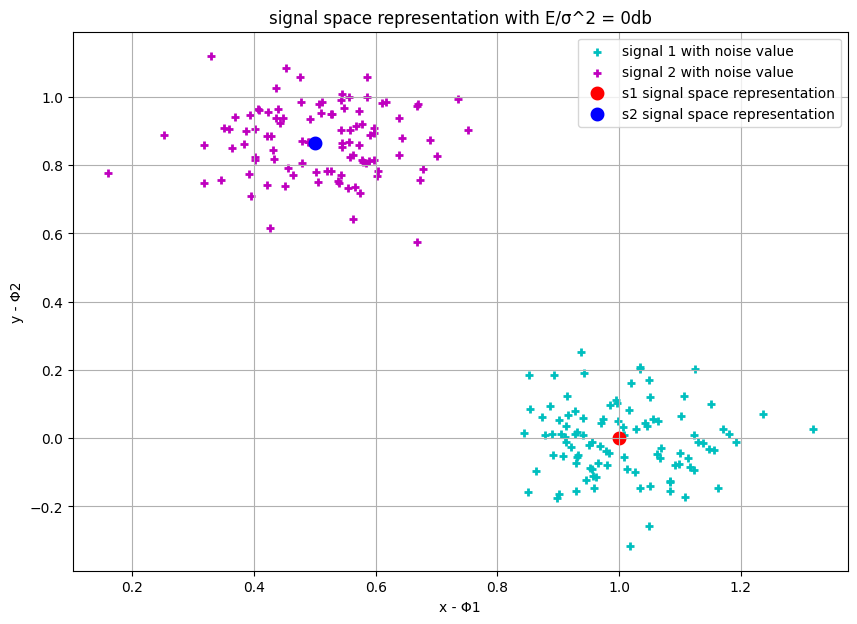

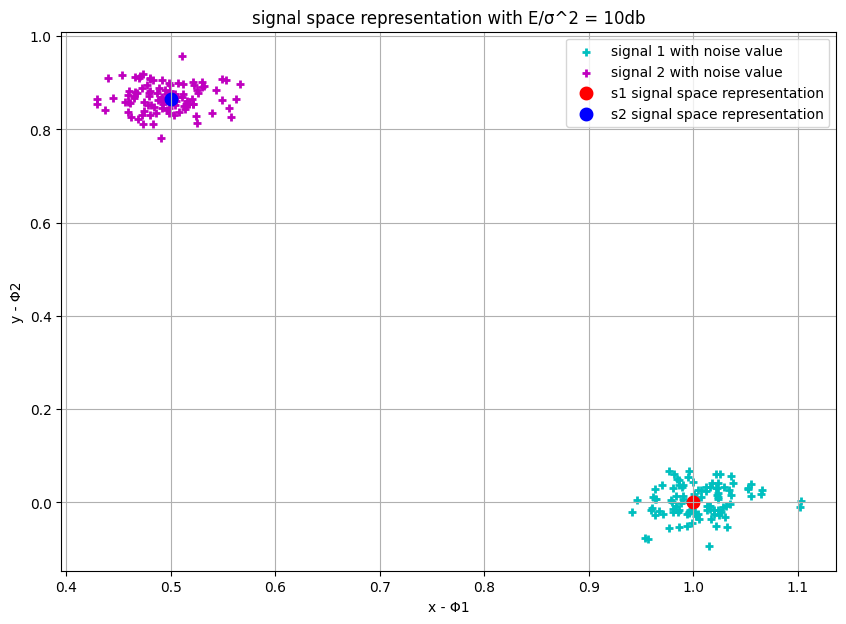

In [6]:
# receive with ramp filter
e1 = np.sum(np.square(np.asanyarray(s1))) / len(s1)
e2 = np.sum(np.square(np.asanyarray(s1))) / len(s2)


# for E/(sigma^2) in values of -5,0,10 db
for E_div_sigma_2_db in [-5, 0, 10]:
    E_div_sigma_2 = 10 ** (E_div_sigma_2_db/10) # convert to linear

    σ_1 = (e1/E_div_sigma_2) ** 0.5 # calculate sigma value
    σ_2 = (e2/E_div_sigma_2) ** 0.5
    
    r11_array = [signal_space(s1 + np.random.normal(0, σ_1, samples_no), Φ1, Φ2)[0] for _ in range(100)]
    r12_array = [signal_space(s1 + np.random.normal(0, σ_1, samples_no), Φ1, Φ2)[1] for _ in range(100)]
    r21_array = [signal_space(s2 + np.random.normal(0, σ_2, samples_no), Φ1, Φ2)[0] for _ in range(100)]
    r22_array = [signal_space(s2 + np.random.normal(0, σ_2, samples_no), Φ1, Φ2)[1] for _ in range(100)]

    # ploting
    plt.figure(figsize=(10, 7))
    plt.scatter(r11_array, r12_array,  marker='+', linewidths=2,
                label="signal 1 with noise value", c='c')
    plt.scatter(r21_array, r22_array,  marker='+', linewidths=2,
                label="signal 2 with noise value", c='m')

    plt.scatter([s11], [s12],  marker="o", linewidths=4,
                label="s1 signal space representation", c='r')
    plt.scatter([s21], [s22],  marker="o", linewidths=4,
                label="s2 signal space representation", c='b')


    plt.xlabel('x - Φ1')
    plt.ylabel('y - Φ2')
    plt.title('signal space representation with E/σ^2 = ' +
              str(E_div_sigma_2_db) + 'db')

    plt.legend()
    plt.grid()
    plt.show()


How does the noise affect the signal space? Does the noise effect increase or decrease
with increasing 𝜎2?
the noise move the position of the signal space representation for each signal then it reduces the accuracy of signal recognition.
when the sigma increases, the E/sigma^2 decreses, and consequently, the noise effect increases.  
